In [28]:
%load_ext autoreload
%autoreload 2

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data_loader import *
import src.models.similarity_matrix as sm

import datetime

In [30]:

# Define a tuple of file paths and column names
files_and_columns = (
    ('data/paths_finished.tsv', ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating']),
    ('data/paths_unfinished.tsv', ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type']),
    ('data/articles.tsv', ['article']),
    ('data/categories.tsv', ['article', 'category'])
)

def read_files(file_tuples):
    dataframes = []
    for path, column_names in file_tuples:
        df = pd.read_csv(path, sep='\t', comment='#', names=column_names, header=None)
        dataframes.append(df)
    return dataframes

paths_finished, paths_unfinished, articles, categories  = read_files(files_and_columns)

# Correlation US politics

In [3]:
import datetime
paths_finished["date"] = paths_finished.timestamp.apply(lambda d:  datetime.datetime.utcfromtimestamp(d))
paths_finished = paths_finished.sort_values(by="date", ascending=False)

In [4]:
# extract article names where category possess "Sports"
articles = categories[categories["category"].str.contains("Political_People")]["article"]
# paths_finished["theme"] = paths_finished["path"].apply(lambda x: any([article in articles.values for article in x.split(";")]))
paths_finished["theme"] = paths_finished["path"].apply(lambda x: any([article=="Barack_Obama" for article in x.split(";")]))


#plot the number of paths that contain at least one article from the category "Sports" over time
#keep only years and months
paths_finished["date"] = paths_finished["date"].apply(lambda x: x.strftime('%Y-%m'))
# group by date and count
grouped = paths_finished.groupby(["date", "theme"]).size().reset_index(name='count')
unique_dates = grouped['date'].unique()

# Filter for dates that are missing a True theme
for date in unique_dates:
    # Check if there's a row with theme=True for this date
    if not ((grouped['date'] == date) & (grouped['theme'] == True)).any():
        # Append a new row with theme=True and count=0
        grouped = pd.concat([grouped, pd.DataFrame({'date': [date], 'theme': [True], 'count': [0]})], ignore_index=True)

# Sort by date to keep the order
grouped = grouped.sort_values(by='date').reset_index(drop=True)

grouped["ratio"] = grouped.apply(lambda x: x["count"]/grouped[(grouped["date"]==x["date"]) & (grouped["theme"]==False)]["count"].values[0], axis=1)
grouped

,date,theme,count,ratio
0,2008-08,False,89,1.0
1,2008-08,True,0,0.0
2,2008-09,False,318,1.0
3,2008-09,True,0,0.0
4,2008-10,False,756,1.0
...,...,...,...,...
127,2013-11,False,799,1.0
128,2013-12,False,580,1.0
129,2013-12,True,0,0.0
130,2014-01,False,321,1.0


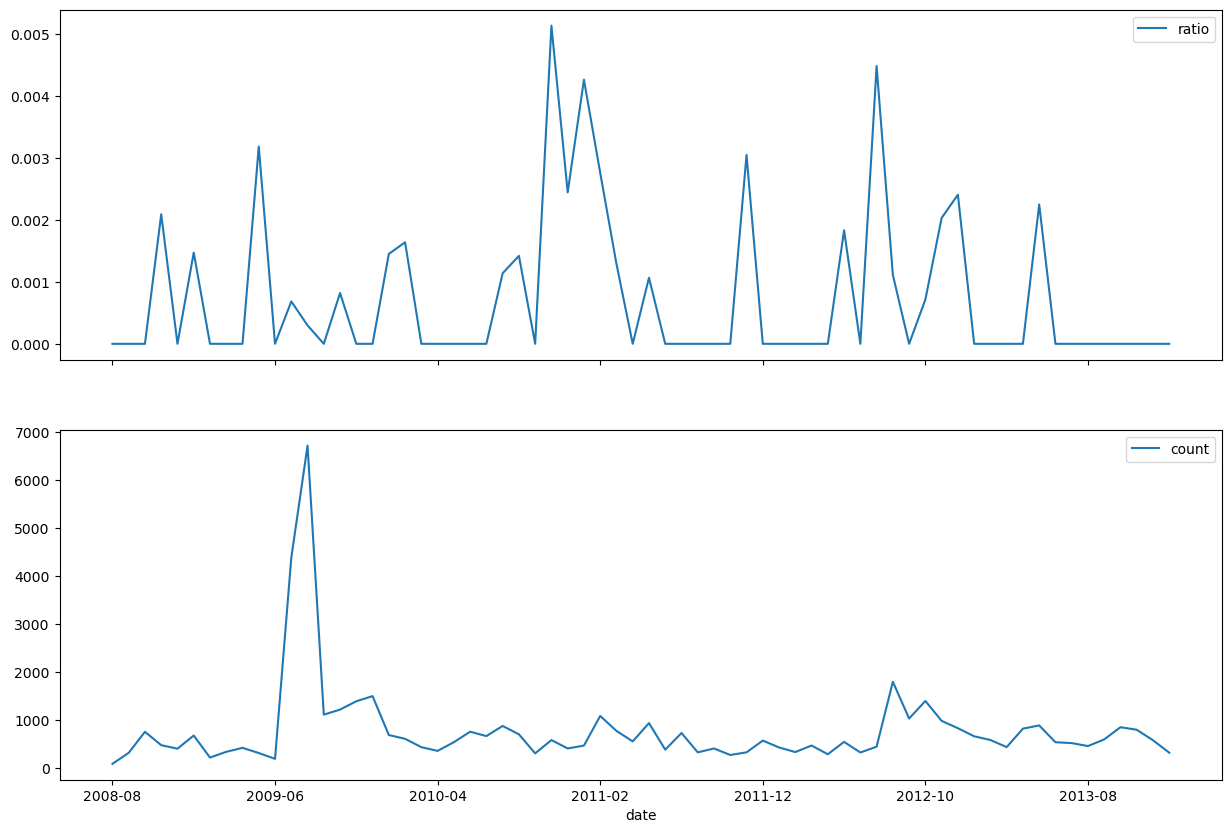

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(sharex=True, nrows=2, ncols=1, figsize=(15, 10))
grouped[grouped["theme"]==True].plot(x="date", y="ratio", ax=ax[0])
grouped[grouped["theme"]==False].plot(x="date", y="count", ax=ax[1])
plt.show()

# Temporal Shifts in Navigational Patterns (Game Strategy Over Time)

In [16]:
import datetime
paths_finished["date"] = paths_finished.timestamp.apply(lambda d:  datetime.datetime.utcfromtimestamp(d))
paths_finished = paths_finished.sort_values(by="date", ascending=False)
paths_finished["length"] = paths_finished["path"].apply(lambda x: len(x.split(";")))
paths_finished["date"] = paths_finished["date"].apply(lambda x: x.strftime('%Y-%m'))

In [18]:
paths_finished

,hashedIpAddress,timestamp,durationInSec,path,rating,date,length
935,1cf0cbb3281049ab,1389823250,400,ASCII;Computer;Automobile;Germany;Adolf_Hitler...,NaN,2014-01,6
35658,1cf0cbb3281049ab,1389822405,79,Bird_of_prey;Eagle;United_States;Moon;Lunar_ec...,2.0,2014-01,5
11965,473d6ac602c2b198,1389821745,9,Sudan;Seychelles,NaN,2014-01,2
20951,473d6ac602c2b198,1389821729,35,Egyptian_pyramids;Archaeology;Agriculture;Milk,NaN,2014-01,4
51088,473d6ac602c2b198,1389821687,130,Hubble%27s_law;Albert_Einstein;Israel;Argentin...,NaN,2014-01,10
...,...,...,...,...,...,...,...
2510,321e4b101c5b58ff,1219099695,81,Brazil;Agriculture;Ethanol;Hydrogen;Chemical_e...,NaN,2008-08,7
4869,321e4b101c5b58ff,1219099185,91,George_W._Bush;Jesus;Christianity;Roman_Cathol...,2.0,2008-08,5
10377,NaN,1219094972,96,Heat;Latin;Europe;Italy,NaN,2008-08,4
13719,NaN,1219094972,140,Tyrannosaurus;London;Temperate;Weather;Solar_S...,NaN,2008-08,6


<Axes: xlabel='date'>

<Figure size 1500x1000 with 0 Axes>

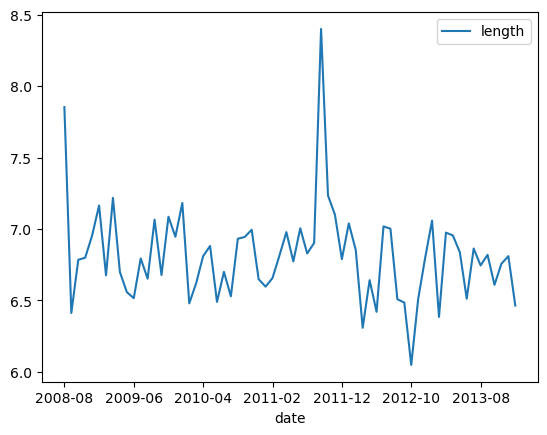

In [17]:
grouped_length = paths_finished.groupby(["date"]).agg({"length": "mean"}).reset_index()
plt.figure(figsize=(15, 10))
grouped_length.plot(x="date", y="length")

<Axes: xlabel='date'>

<Figure size 1500x1000 with 0 Axes>

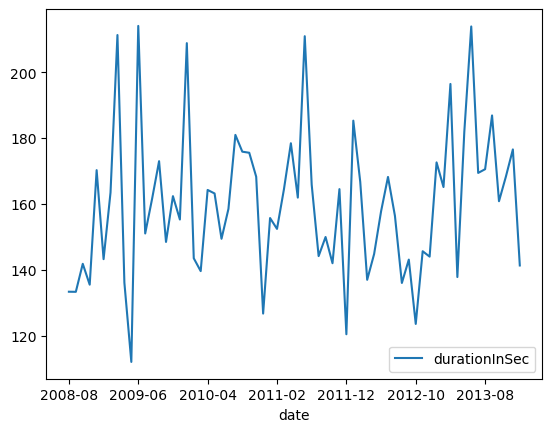

In [20]:
grouped_duration = paths_finished.groupby(["date"]).agg({"durationInSec": "mean"}).reset_index()
plt.figure(figsize=(15, 10))
grouped_duration.plot(x="date", y="durationInSec")

# Sentiment analysis

In [31]:
from urllib.parse import unquote

In [ ]:
paths_finished["date"] = paths_finished.timestamp.apply(lambda d:  datetime.datetime.utcfromtimestamp(d))
paths_finished = paths_finished.sort_values(by="date", ascending=False)
paths_finished["path"] = paths_finished["path"].apply(lambda x: [unquote(article) for article in x.split(";")])
paths_finished

In [ ]:
# extract all path with "Barack_Obama" in it
paths_finished_obbama = paths_finished[paths_finished["path"].apply(lambda x: "Barack_Obama" in x)]
len(paths_finished_obbama)

#extract all articles path that are before or after the article  "Barack_Obama"
articles_associated = []
for path in paths_finished_obbama["path"]:
    index = path.index("Barack_Obama")
    articles_associated.append(path[index-1] if index > 0 else None)
    articles_associated.append(path[index+1] if index < len(path)-1 else None)

# remove None and duplicates
articles_associated = [article for article in articles_associated if article is not None]
articles_associated = list(set(articles_associated))
articles_associated

37

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
sentiments = sentiment_pipeline(articles_associated)
sentiments = pd.DataFrame(sentiments)
sentiments["article"] = articles_associated
sentiments = sentiments[sentiments["score"]>0.8]
sentiments

,label,score,article
0,POSITIVE,0.978041,Ethiopia
2,NEGATIVE,0.999374,AIDS
4,POSITIVE,0.818699,<
5,NEGATIVE,0.998475,Terrorism
6,NEGATIVE,0.836602,Jew
7,POSITIVE,0.995604,Kenya
8,POSITIVE,0.996469,Franklin_D._Roosevelt
9,POSITIVE,0.812479,United_States_Senate
10,POSITIVE,0.993721,Ukraine
11,POSITIVE,0.998632,Chicago


In [20]:
sentiments.groupby("label").size()

label
NEGATIVE     4
POSITIVE    14
dtype: int64

### Climate

In [77]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

c:\Users\camil\miniconda3\envs\ada\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'POSITIVE', 'score': 0.998561680316925},
 {'label': 'NEGATIVE', 'score': 0.9991401433944702}]

In [78]:
def sentiment_analysis(paths_finished, article, sentiment_pipeline= sentiment_pipeline):
    paths_finished["date"] = paths_finished.timestamp.apply(lambda d:  datetime.datetime.utcfromtimestamp(d))
    paths_finished = paths_finished.sort_values(by="date", ascending=False)

    paths_finished_Climate_change = paths_finished[paths_finished["path"].apply(lambda x: article in x)]
    paths_finished_Climate_change["date"] = paths_finished_Climate_change["date"].apply(lambda x: x.strftime('%Y')) #-%m

    def get_associated_articles(path, article):
        articles_associated = []
        index = path.index(article)
        articles_associated.append(path[index-1] if index > 0 else None)
        articles_associated.append(path[index+1] if index < len(path)-1 else None)
        return articles_associated
        
    paths_finished_Climate_change["associated"] = paths_finished_Climate_change["path"].apply(get_associated_articles, article=article)
    print(len(paths_finished_Climate_change))

    grouped = paths_finished_Climate_change.groupby(["date"]).agg({"associated": "sum"})
    
    def sentiment_score(list_article, sentiment_pipeline= sentiment_pipeline): 
        articles_associated = [article for article in list_article if article is not None]
        articles_associated = list(set(articles_associated))  
        sentiments = sentiment_pipeline(articles_associated)
        sentiments = pd.DataFrame(sentiments)
        sentiments = sentiments[sentiments["score"]>0.8]
        return (len( sentiments[sentiments["label"] == "POSITIVE"]))/len(sentiments)

    grouped["score"] = grouped["associated"].apply(sentiment_score, sentiment_pipeline)
    return grouped

In [79]:
climate = sentiment_analysis(paths_finished, "Climate")

C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3582499600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["date"] = paths_finished_Climate_change["date"].apply(lambda x: x.strftime('%Y')) #-%m
C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3582499600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["associated"] = paths_finished_Climate_change["path"].apply(get_associated_articles, article=article)
C:\Users\camil\AppData\Local\Temp\ip

317


In [80]:
climate

,associated,score
date,,
2008,"[Ecology, Global_warming, Geography, Tropical_...",0.882353
2009,"[Serbia, Global_warming, Ice, Weather, Greece,...",0.800000
2010,"[<, <, Sun, Meteorology, Climate_change, None,...",0.769231
2011,"[<, Global_warming, Meteorology, Sea, Sun, Wea...",0.785714
2012,"[Ukraine, Global_warming, Earth, Global_warmin...",0.740741
2013,"[None, Global_warming, New_Zealand, Weather, T...",0.923077
2014,"[Ice, Global_warming, Finland, None]",0.666667


### Natural_disaster

In [64]:
disaster = sentiment_analysis(paths_finished, "Natural_disaster")
disaster

C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3008977688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["date"] = paths_finished_Climate_change["date"].apply(lambda x: x.strftime('%Y')) #-%m
C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3008977688.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["associated"] = paths_finished_Climate_change["path"].apply(get_associated_articles, article=article)


25


,associated,score
date,,
2009,"[Ecology, Tsunami, Hurricane_Katrina, None, Hu...",0.750000
2010,"[None, Japan, 2004_Indian_Ocean_earthquake, No...",0.833333
2011,"[Mount_Nyiragongo, Earthquake, None, Tornado, ...",0.250000
2012,"[Dublin, Earth, House, AIDS]",0.750000
2013,"[2004_Indian_Ocean_earthquake, None, Effect_of...",0.333333


In [81]:
disaster = sentiment_analysis(paths_finished, "Religion")
disaster

C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3582499600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["date"] = paths_finished_Climate_change["date"].apply(lambda x: x.strftime('%Y')) #-%m
C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3582499600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["associated"] = paths_finished_Climate_change["path"].apply(get_associated_articles, article=article)
C:\Users\camil\AppData\Local\Temp\ip

677


,associated,score
date,,
2008,"[Christianity, <, <, God, Christianity, Atheis...",0.684211
2009,"[Islam, Philosophy, South_Africa, None, Mesopo...",0.698925
2010,"[Jew, Christianity, None, Evolution, Politics,...",0.679245
2011,"[None, Philosophy, Hinduism, Judaism, <, Human...",0.744681
2012,"[Zeus, Christianity, Buddhism, Islam, Jew, God...",0.702128
2013,"[Mythology, Buddhism, Human, Roman_Catholic_Ch...",0.723404
2014,"[Philosophy, Atheism, Buddhism, Christianity, ...",1.000000


In [82]:
disaster = sentiment_analysis(paths_finished, "Russia")
disaster

C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3582499600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["date"] = paths_finished_Climate_change["date"].apply(lambda x: x.strftime('%Y')) #-%m
C:\Users\camil\AppData\Local\Temp\ipykernel_23004\3582499600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_Climate_change["associated"] = paths_finished_Climate_change["path"].apply(get_associated_articles, article=article)
C:\Users\camil\AppData\Local\Temp\ip

1007


,associated,score
date,,
2008,"[Soviet_Union, Saint_Petersburg, Russian_langu...",0.648649
2009,"[Opera, Serbia, <, None, Soviet_Union, <, Chem...",0.681818
2010,"[Helsinki, Petroleum, Europe, Soviet_Union, Pe...",0.680000
2011,"[Russian_language, Europe, Europe, Sputnik_1, ...",0.645161
2012,"[Soviet_Union, None, United_States, National_A...",0.585106
2013,"[Europe, Asia, Zoroaster, Turkey, Opera, Tribe...",0.643678
2014,"[Helium, Poland, Norway, Soviet_Union, Dmitri_...",0.500000
